In [1]:
df_train = pd.read_csv(r'C:\Users\SARVESH\Documents\GitHub\House price prediction\train_clean.csv')

In [2]:
sns.distplot(df_train['SalePrice'])

In [3]:
print("Skewness:%f" %df_train['SalePrice'].skew())
print("Kurtosis:%f" %df_train['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


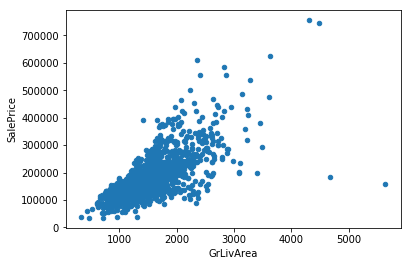

In [4]:
df_train.plot.scatter(x = 'GrLivArea' , y = 'SalePrice')

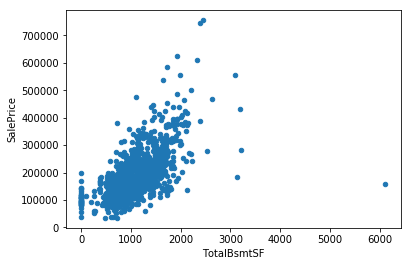

In [5]:
df_train.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

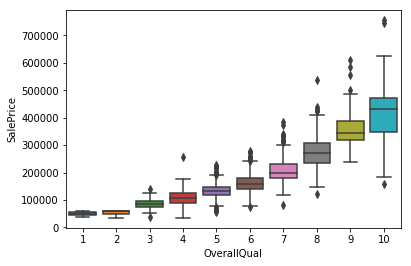

In [6]:
sns.boxplot(x = df_train['OverallQual'], y = df_train['SalePrice'])

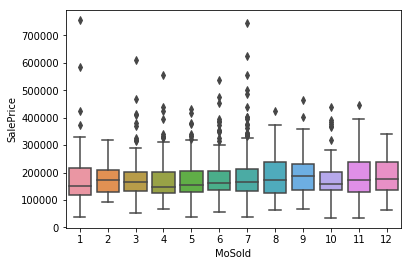

In [7]:
sns.boxplot(x = df_train['MoSold'], y = df_train['SalePrice'])

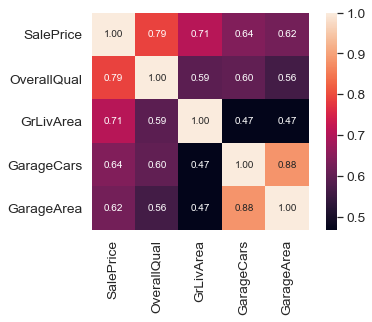

In [8]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
df_train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

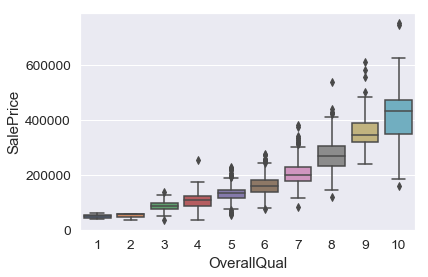

In [10]:
sns.boxplot(x = df_train.OverallQual , y = df_train.SalePrice)

In [11]:
df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

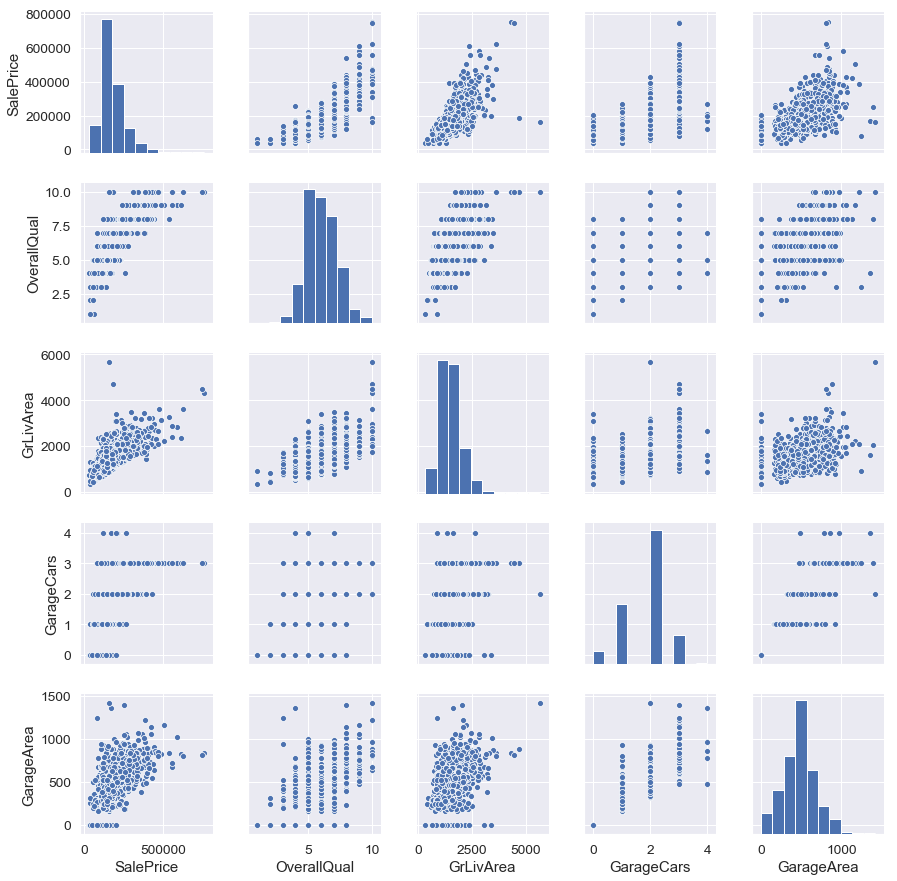

In [12]:
sns.pairplot(df_train[cols],height =2.5)

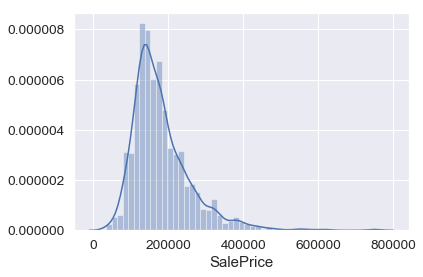

In [13]:
sns.distplot(df_train['SalePrice'])

In [14]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


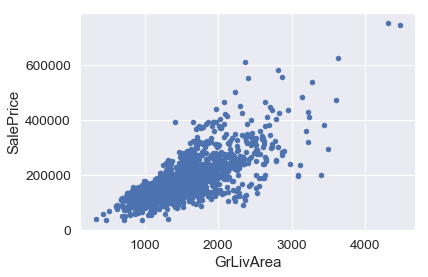

In [15]:
df_train.plot.scatter(x = 'GrLivArea' , y = 'SalePrice')

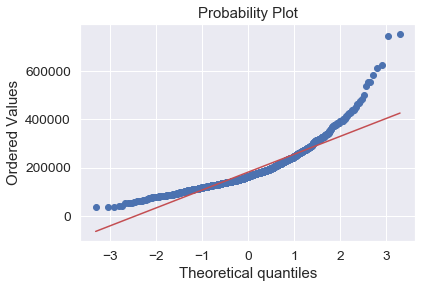

In [16]:
from scipy import stats
from scipy.stats import norm , skew
stats.probplot(df_train['SalePrice'],plot = plt)
plt.show()

In [17]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
EnclosedPorch,3.083987


In [18]:
df_train.shape

(1458, 76)

In [19]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)

There are 38 skewed numerical features to Box Cox transform


In [20]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.730463,5.684507,RL,5.831328,19.212182,Pave,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,0.0,0.0,0.0,1.194318,14.195323,WD,Normal,35.190995
1,1.194318,3.858807,RL,6.221214,19.712205,Pave,Reg,Lvl,AllPub,FR2,...,0.000000,0.0,0.0,0.0,0.0,2.055642,14.193765,WD,Normal,34.329249
2,1.540963,5.684507,RL,5.914940,20.347241,Pave,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,0.0,0.0,0.0,2.750250,14.195323,WD,Normal,35.629466
3,1.820334,5.968981,RL,5.684507,19.691553,Pave,IR1,Lvl,AllPub,Corner,...,8.797736,0.0,0.0,0.0,0.0,1.194318,14.192207,WD,Abnorml,32.763482
4,2.055642,5.684507,RL,6.314735,21.325160,Pave,IR1,Lvl,AllPub,FR2,...,0.000000,0.0,0.0,0.0,0.0,3.128239,14.195323,WD,Normal,36.346360


In [21]:
df_train = pd.read_csv(r'C:\Users\SARVESH\Documents\GitHub\House price prediction\train_clean_mod.csv')

In [22]:
df_train.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,0,856,854,0,3,706,0,1,0,150.0,...,0,0,1,1,0,0,0,0,1,0
1,1,1262,0,0,3,978,0,0,1,284.0,...,0,0,1,1,0,0,0,0,1,0
2,2,920,866,0,3,486,0,1,0,434.0,...,0,0,1,1,0,0,0,0,1,0
3,3,961,756,0,3,216,0,1,0,540.0,...,0,0,1,0,0,0,0,1,0,0
4,4,1145,1053,0,4,655,0,1,0,490.0,...,0,0,1,1,0,0,0,0,1,0


In [23]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [24]:
y_train = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis = 1)

In [25]:
df_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [26]:
y_train.shape

(1459,)

In [27]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [28]:
random_cv.fit(df_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[14:33:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [29]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.15, max_delta_step=0,
       max_depth=2, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [30]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=2, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
regressor.fit(df_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.15, max_delta_step=0,
       max_depth=2, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [32]:
df_test = pd.read_csv(r"C:\Users\SARVESH\Documents\GitHub\House price prediction\test_clean.csv" ,index_col = None)

In [33]:
df_test = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [34]:
df_test.shape

(1459, 9)

In [35]:
y_pred=regressor.predict(df_test)

In [36]:
y_pred = pd.DataFrame(y_pred)

In [37]:
y_pred.to_csv(r'C:\Users\SARVESH\Documents\GitHub\House price prediction\sub10_clean.csv')

In [38]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [39]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =5, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=5, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=5, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [40]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 37989.1786 (9777.2548)



In [41]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 40910.7308 (8841.7603)



In [42]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.7487e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.53767e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.42698e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.85236e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.81891e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

Kernel Ridge score: 32521.5507 (7901.5131)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=8.87454e-17): result may not be accurate.
  overwrite_a=False)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=4.65818e-17): result may not be accurate.
  overwrite_a=False)


In [43]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
df_test = pd.read_csv(r'C:\Users\SARVESH\Documents\GitHub\House price prediction\test_clean_mod.csv')

In [ ]:
df_test.shape

In [ ]:
df_train.shape

In [ ]:
predict(df_test)